In [1]:
import numpy as np
import tensorflow as tf

In [2]:
train_dir = 'data/train'
test_dir = 'data/test'

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
 train_datagen = ImageDataGenerator(rescale=1./255, 
                                  rotation_range=20,
                                  width_shift_range=0.2,
                                  horizontal_flip=True,
                                  zoom_range=0.2,
                                  shear_range=0.2,
                                  height_shift_range=0.2)
test_datagen = ImageDataGenerator(rescale=1./255)

In [5]:
train_data = train_datagen.flow_from_directory(train_dir,target_size=(224,224),batch_size=32,class_mode='binary',seed=42)
test_data = test_datagen.flow_from_directory(test_dir,target_size=(224,224),batch_size=32,class_mode='binary',seed=42)

Found 4713 images belonging to 2 classes.
Found 2840 images belonging to 2 classes.


In [6]:
import pathlib
data_dir = pathlib.Path(train_dir)
data_dir

WindowsPath('data/train')

In [7]:
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
class_names

array(['with_mask', 'without_mask'], dtype='<U12')

In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os

def show_random_image(directory,class_name):
    direc = directory+class_name
    random_image = random.sample(os.listdir(direc) ,1)
    image = mpimg.imread(direc + "/" + random_image[0])
    plt.imshow(image)
    plt.title(class_name)

Enter with_mask(0) or without_mask(1) for generating random image:-0


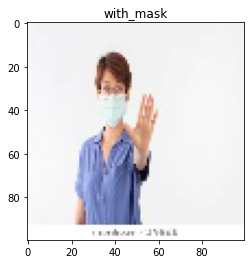

In [9]:
n=int(input("Enter with_mask(0) or without_mask(1) for generating random image:-"))
show_random_image(train_dir+"/",class_names[n])

In [10]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=32,
                          kernel_size=3,
                          activation='relu',
                          input_shape=(224,224,3)),
    tf.keras.layers.MaxPool2D(pool_size=2,padding='valid'),
     tf.keras.layers.Conv2D(filters=64,
                          kernel_size=3,
                          activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2,padding='valid'),
    tf.keras.layers.Conv2D(filters=64,
                          kernel_size=3,
                          activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2,padding='valid'),
    tf.keras.layers.Conv2D(filters=128,
                          kernel_size=3,
                          activation='relu'),
     tf.keras.layers.MaxPool2D(pool_size=2,padding='valid'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

In [11]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [12]:
model_1=model.fit(train_data,epochs=5,steps_per_epoch=len(train_data),validation_data=test_data,validation_steps=len(test_data))

Epoch 1/5
 98/148 [==================>...........] - ETA: 32s - loss: 0.5269 - accuracy: 0.7430

D:\Anaconda\lib\site-packages\PIL\Image.py:962: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


148/148 [==============================] - 111s 745ms/step - loss: 0.4925 - accuracy: 0.7664 - val_loss: 0.3486 - val_accuracy: 0.8732
Epoch 2/5
148/148 [==============================] - 113s 760ms/step - loss: 0.3809 - accuracy: 0.8330 - val_loss: 0.3203 - val_accuracy: 0.8898
Epoch 3/5
148/148 [==============================] - 112s 758ms/step - loss: 0.3454 - accuracy: 0.8547 - val_loss: 0.3090 - val_accuracy: 0.8898
Epoch 4/5
148/148 [==============================] - 112s 757ms/step - loss: 0.3085 - accuracy: 0.8689 - val_loss: 0.2635 - val_accuracy: 0.9014
Epoch 5/5
148/148 [==============================] - 113s 763ms/step - loss: 0.2757 - accuracy: 0.8871 - val_loss: 0.3277 - val_accuracy: 0.8982


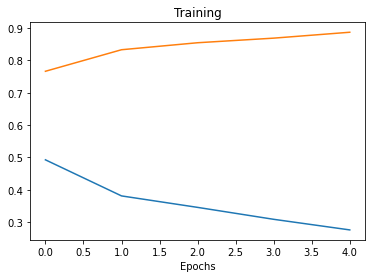

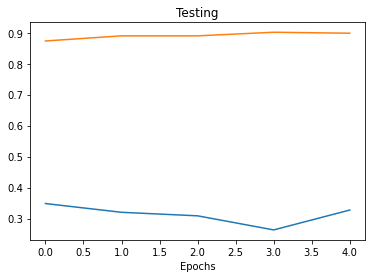

In [16]:
def plot_loss_and_accuracy_curves(model):
    loss = model.history['loss']
    accuracy = model.history['accuracy']
    test_loss = model.history['val_loss']
    test_accuracy = model.history['val_accuracy']

    epochs = range(len(model.history['loss']))

    plt.plot(epochs,loss,label='Training Loss')
    plt.plot(epochs,accuracy,label='Training Accuracy')
    plt.title('Training')
    plt.xlabel('Epochs')

    plt.figure()
    plt.plot(epochs,test_loss,label='Testing Loss')
    plt.plot(epochs,test_accuracy,label='Testing Accuracy')
    plt.title('Testing')
    plt.xlabel('Epochs')
plot_loss_and_accuracy_curves(model_1)

In [14]:
def prep_and_predict(model,filename,class_names,image_size=224):
    image = tf.io.read_file(filename) # Reading the file
    image = tf.image.decode_image(image,channels=3) # Decode the read image to tensor and making sure to have 3 channels due to rgb
    image = tf.image.resize(image,size=(image_size,image_size))

    image = image/255. # Rescaling the data

    prediction = model.predict(tf.expand_dims(image,axis=0)) # Expanding the dimensions to make sure it matches with the dimensions of the input data

    # Ploting the prediction 
    plt.imshow(image)
    pred_class = class_names[int(tf.round(prediction)[0][0])]
    print(pred_class)
    plt.title(f"Prediction: {pred_class}")
    plt.axis(False)

In [15]:
prep_and_predict(model,"littu.jpg",class_names)

NotFoundError: NewRandomAccessFile failed to Create/Open: littu.jpg : The system cannot find the file specified.
; No such file or directory [Op:ReadFile]

In [ ]:
s=input("Enter filename with extention:-")
prep_and_predict(model,s,class_names)

In [ ]:
prep_and_predict(model,"littu2.jpg",class_names)

In [ ]:
model.summary()

In [18]:
# import cv2
# image_size=224
# cam = cv2.VideoCapture(0)
# while True:
#     success,img=cam.read()
#     cv2.imshow("Video",img)
#     img=tf.image.resize(img,size=(image_size,image_size))
#     prediction=model.predict(tf.expand_dims(img,axis=0))
#     pred_class = class_names[int(tf.round(prediction)[0][0])]
#     cv2.putText(img,pred_class)
#     cv2.imshow()
#     if cv2.waitKey(1) & 0xFF==ord('q'):
#         break

error: OpenCV(4.5.5) :-1: error: (-5:Bad argument) in function 'putText'
> Overload resolution failed:
>  - putText() missing required argument 'org' (pos 3)
>  - putText() missing required argument 'org' (pos 3)


In [ ]:
# Save a model as a JSON file or YAML file or HDF5 file ,
# Saving a model as HDF5 file is better because the other formats don't save the weights and losses of the NN HDF5 saves the whole NN

# Save a model
model.save("face_mask_detection.h5")

from tensorflow.keras.model import load_model

loaded_model = load_model("face_detection.h5")
loss, accuracy = loaded_model.evaluate() # Give test data in the paranthesis
